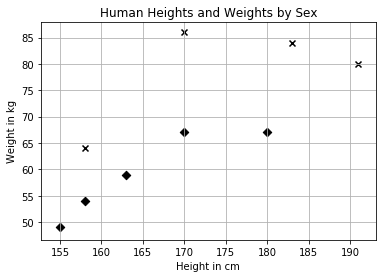

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

In [12]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([  6.70820393,  21.9317122 ,  31.30495168,  37.36308338,
        21.        ,  13.60147051,  25.17935662,  16.2788206 ,  15.29705854])

In [13]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'],
      dtype='<U6')

In [14]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

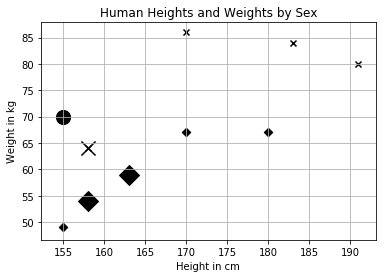

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [17]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))

prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'],
      dtype='<U6')

In [18]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,predictions_binarized))

Accuracy: 0.75


In [20]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized,predictions_binarized))

Precision: 1.0


In [21]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,predictions_binarized))

Recall: 0.5


In [22]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized,predictions_binarized))

F1 score: 0.666666666667


In [23]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized,
                                                                 predictions_binarized))

Matthews correlation coefficient: 0.57735026919


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized,target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



# Regression with KNN

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

Predicted weights: [ 70.66666667  79.          59.          70.66666667]
Actual weights: [65, 96, 52, 67]
Coefficient of determination: 0.629056522674
Mean absolute error: 8.33333333333
Mean squared error: 95.8888888889


# Scaling features

In [15]:
from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([
[1700, 1],
[1600, 0]
])
x_test = np.array([1640, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

# heights in meters
X_train = np.array([
[1.7, 1],
[1.6, 0]
])
x_test = np.array([164, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.0124980475
162.3
162.40307878855006


In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)

print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]
Predicted wieghts: [ 78.          83.33333333  54.          64.33333333]
Coefficient of determination: 0.670642596175
Mean absolute error: 7.58333333333
Mean squared error: 85.1388888889


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
